В этом ноутбуке содержится код по созданию собственных весов и внедрения их в модель YOLOv3

#Сначала создадим веса нашей модели

In [ ]:
#Скрипт для загрузки данных
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 43.69 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14730 (delta 2), reused 7 (delta 2), pack-reused 14722
Receiving objects: 100% (14730/14730), 13.28 MiB | 23.40 MiB/s, done.
Resolving deltas: 100% (10017/10017), done.


In [ ]:
%cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [ ]:
%%writefile classes.txt
Computer mouse
Pen

Overwriting classes.txt


In [ ]:
#Загрузим фото мышей и ручек с разметками
!curl "https://d1vvhvl2y92vvt.cloudfront.net/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
!unzip awscliv2.zip
!sudo ./aws/install
!python main.py downloader --classes classes.txt --type_csv train --limit 1000 --multiclasses 1

Streaming output truncated to the last 5000 lines.
  inflating: aws/dist/awscli/examples/kinesis/list-streams.rst  
  inflating: aws/dist/awscli/examples/kinesis/merge-shards.rst  
  inflating: aws/dist/awscli/examples/kinesis/put-record.rst  
  inflating: aws/dist/awscli/examples/kinesis/register-stream-consumer.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/list-queues.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/delete-job-template.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/create-job.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/get-job.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/delete-queue.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/update-job-template.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/update-queue.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/cancel-job.rst  
  inflating: aws/dist/awscli/examples/mediaconvert/get-preset.rst  
  inflating: aws/dist/awscli/examples/mediaconv

Не забудьте проверить название переносимой папки!

In [ ]:
!mv /content/OIDv4_ToolKit/OID/Dataset/train/Computer-mouse_Pen/Label/* .
!rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Computer-mouse_Pen/Label
!mv /content/OIDv4_ToolKit/OID/Dataset/train/Computer-mouse_Pen /content/darknet/data/obj

In [ ]:
%cd ..
%cd darknet/cfg

/content
/
/content/darknet/cfg


In [ ]:
#загрузка нам нужного файла конфигурации
!gdown --id 13gIzYISZnwZnJtdbynxgOHmKMh-pL0wE

Downloading...
From: https://drive.google.com/uc?id=13gIzYISZnwZnJtdbynxgOHmKMh-pL0wE
To: /content/darknet/cfg/yolov3-custom.cfg
100% 9.12k/9.12k [00:00<00:00, 8.29MB/s]


In [ ]:
%cd ..
%cd data

/content/darknet
/content/darknet/data


In [ ]:
%%writefile obj.names
Computer mouse
Pen

Writing obj.names


In [ ]:
%%writefile obj.data
classes = 2
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = backup/

Writing obj.data


In [ ]:
%cd ..
!curl -o generate_train.py https://raw.githubusercontent.com/theAIGuysCode/YoloGenerateTrainingFile/master/generate_train.py
!python generate_train.py

/content/darknet
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   381  100   381    0     0   2164      0 --:--:-- --:--:-- --:--:--  2164


In [ ]:
# change makefile to have GPU and OPENCV enabled
!mkdir backup
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-03-04 10:33:04--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  98.6MB/s    in 1.6s    

2021-03-04 10:33:05 (98.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!chmod 755 -R /content/drive/MyDrive/Yolov3/darknet

In [ ]:
#учить
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

In [ ]:
%cd /content/drive/MyDrive/Yolov3/darknet

/content/drive/MyDrive/Yolov3/darknet


In [ ]:
#доучить
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg backup/yolov3-custom_last.weights -dont_show

In [ ]:
#тест
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /content/drive/MyDrive/Yolov3/darknet/backup/yolov3-custom_last.weights test2.jpg -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

#Проверим что получилось

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

from absl import logging
from itertools import repeat

from tensorflow.keras import Model
from tensorflow.keras.layers import Add, Concatenate, Lambda
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU
from tensorflow.keras.layers import MaxPool2D, UpSampling2D, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-26 06:51:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.0MB/s    in 11s     

2021-03-26 06:51:24 (21.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
yolo_iou_threshold   = 0.6 # iou threshold
yolo_score_threshold = 0.6 # score threshold

weightsyolov3 = 'yolov3.weights' # path to weights file
weights= 'checkpoints/yolov3.tf' # path to checkpoints file
size= 416             #resize images to\
checkpoints = 'checkpoints/yolov3.tf'
num_classes = 80      # number of classes in the model

In [ ]:
YOLO_V3_LAYERS = [
  'yolo_darknet',
  'yolo_conv_0',
  'yolo_output_0',
  'yolo_conv_1',
  'yolo_output_1',
  'yolo_conv_2',
  'yolo_output_2',
]

In [ ]:
def load_darknet_weights(model, weights_file):
  wf = open(weights_file, 'rb')
  major, minor, revision, seen, _ = np.fromfile(wf, dtype=np.int32, count=5)
  layers = YOLO_V3_LAYERS

  for layer_name in layers:
    sub_model = model.get_layer(layer_name)
    for i, layer in enumerate(sub_model.layers):
      if not layer.name.startswith('conv2d'):
        continue
      batch_norm = None
      if i + 1 < len(sub_model.layers) and \
            sub_model.layers[i + 1].name.startswith('batch_norm'):
        batch_norm = sub_model.layers[i + 1]

      logging.info("{}/{} {}".format(
        sub_model.name, layer.name, 'bn' if batch_norm else 'bias'))

      filters = layer.filters
      size = layer.kernel_size[0]
      in_dim = layer.input_shape[-1]

      if batch_norm is None:
        conv_bias = np.fromfile(wf, dtype=np.float32, count=filters)
      else:
        bn_weights = np.fromfile(
          wf, dtype=np.float32, count=4 * filters)

        bn_weights = bn_weights.reshape((4, filters))[[1, 0, 2, 3]]

      conv_shape = (filters, in_dim, size, size)
      conv_weights = np.fromfile(
        wf, dtype=np.float32, count=np.product(conv_shape))

      conv_weights = conv_weights.reshape(
        conv_shape).transpose([2, 3, 1, 0])

      if batch_norm is None:
        layer.set_weights([conv_weights, conv_bias])
      else:
        layer.set_weights([conv_weights])
        batch_norm.set_weights(bn_weights)

  assert len(wf.read()) == 0, 'failed to read all data'
  wf.close()

In [ ]:
def interval_overlap(interval_1, interval_2):
  x1, x2 = interval_1
  x3, x4 = interval_2
  if x3 < x1:
    return 0 if x4 < x1 else (min(x2,x4) - x1)
  else:
    return 0 if x2 < x3 else (min(x2,x4) - x3)

def intersectionOverUnion(box1, box2):
  intersect_w = interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
  intersect_h = interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
  intersect_area = intersect_w * intersect_h
  
  w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
  w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
  
  union_area = w1*h1 + w2*h2 - intersect_area
  return float(intersect_area) / union_area

In [ ]:
def draw_outputs(img, outputs, class_names):
  boxes, score, classes, nums = outputs
  boxes, score, classes, nums = boxes[0], score[0], classes[0], nums[0]
  wh = np.flip(img.shape[0:2])
  for i in range(nums):
    x1y1 = tuple((np.array(boxes[i][0:2]) * wh).astype(np.int32))
    x2y2 = tuple((np.array(boxes[i][2:4]) * wh).astype(np.int32))
    img = cv2.rectangle(img, x1y1, x2y2, (255, 0, 0), 2)
    img = cv2.putText(img, '{} {:.4f}'.format(
      class_names[int(classes[i])], score[i]),
      x1y1, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
  return img

In [ ]:
class BatchNormalization(tf.keras.layers.BatchNormalization):
  def call(self, x, training=False):
    if training is None: training = tf.constant(False)
    training = tf.logical_and(training, self.trainable)
    return super().call(x, training)

In [ ]:
yolo_anchors = np.array([(10, 13), (16, 30), (33, 23), (30, 61), (62, 45),
                        (59, 119), (116, 90), (156, 198), (373, 326)], np.float32) / 416
yolo_anchor_masks = np.array([[6, 7, 8], [3, 4, 5], [0, 1, 2]])

In [ ]:
def DarknetConv(x, filters, size, strides=1, batch_norm=True):
  if strides == 1:
    padding = 'same'
  else:
    x = ZeroPadding2D(((1, 0), (1, 0)))(x)  # top left half-padding
    padding = 'valid'
  x = Conv2D(filters=filters, kernel_size=size,
          strides=strides, padding=padding,
          use_bias=not batch_norm, kernel_regularizer=l2(0.0005))(x)
  if batch_norm:
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
  return x

def DarknetResidual(x, filters):
  previous  = x
  x = DarknetConv(x, filters // 2, 1)
  x = DarknetConv(x, filters, 3)
  x = Add()([previous , x])
  return x


def DarknetBlock(x, filters, blocks):
  x = DarknetConv(x, filters, 3, strides=2)
  for _ in repeat(None, blocks):
    x = DarknetResidual(x, filters)       
  return x


def Darknet(name=None):
  x = inputs = Input([None, None, 3])
  x = DarknetConv(x, 32, 3)
  x = DarknetBlock(x, 64, 1)
  x = DarknetBlock(x, 128, 2)
  x = x_36 = DarknetBlock(x, 256, 8)
  x = x_61 = DarknetBlock(x, 512, 8)
  x = DarknetBlock(x, 1024, 4)
  return tf.keras.Model(inputs, (x_36, x_61, x), name=name)

In [ ]:
def YoloConv(filters, name=None):
  def yolo_conv(x_in):
    if isinstance(x_in, tuple):
      inputs = Input(x_in[0].shape[1:]), Input(x_in[1].shape[1:])
      x, x_skip = inputs

      x = DarknetConv(x, filters, 1)
      x = UpSampling2D(2)(x)
      x = Concatenate()([x, x_skip])
    else:
      x = inputs = Input(x_in.shape[1:])

    x = DarknetConv(x, filters, 1)
    x = DarknetConv(x, filters * 2, 3)
    x = DarknetConv(x, filters, 1)
    x = DarknetConv(x, filters * 2, 3)
    x = DarknetConv(x, filters, 1)
    return Model(inputs, x, name=name)(x_in)
  return yolo_conv

In [ ]:
def YoloOutput(filters, anchors, classes, name=None):
  def yolo_output(x_in):
    x = inputs = Input(x_in.shape[1:])
    x = DarknetConv(x, filters * 2, 3)
    x = DarknetConv(x, anchors * (classes + 5), 1, batch_norm=False)
    x = Lambda(lambda x: tf.reshape(x, (-1, tf.shape(x)[1], tf.shape(x)[2],
                                        anchors, classes + 5)))(x)
    return tf.keras.Model(inputs, x, name=name)(x_in)
  return yolo_output

In [ ]:
def yolo_boxes(pred, anchors, classes):
  grid_size = tf.shape(pred)[1]
  box_xy, box_wh, score, class_probs = tf.split(pred, (2, 2, 1, classes), axis=-1)

  box_xy = tf.sigmoid(box_xy)
  score = tf.sigmoid(score)
  class_probs = tf.sigmoid(class_probs)
  pred_box = tf.concat((box_xy, box_wh), axis=-1)

  grid = tf.meshgrid(tf.range(grid_size), tf.range(grid_size))
  grid = tf.expand_dims(tf.stack(grid, axis=-1), axis=2)

  box_xy = (box_xy + tf.cast(grid, tf.float32)) /  tf.cast(grid_size, tf.float32)
  box_wh = tf.exp(box_wh) * anchors

  box_x1y1 = box_xy - box_wh / 2
  box_x2y2 = box_xy + box_wh / 2
  bbox = tf.concat([box_x1y1, box_x2y2], axis=-1)

  return bbox, score, class_probs, pred_box

In [ ]:
def nonMaximumSuppression(outputs, anchors, masks, classes):
  boxes, conf, out_type = [], [], []

  for output in outputs:
    boxes.append(tf.reshape(output[0], (tf.shape(output[0])[0], -1, tf.shape(output[0])[-1])))
    conf.append(tf.reshape(output[1], (tf.shape(output[1])[0], -1, tf.shape(output[1])[-1])))
    out_type.append(tf.reshape(output[2], (tf.shape(output[2])[0], -1, tf.shape(output[2])[-1])))

  bbox = tf.concat(boxes, axis=1)
  confidence = tf.concat(conf, axis=1)
  class_probs = tf.concat(out_type, axis=1)

  scores = confidence * class_probs
  
  boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
    boxes=tf.reshape(bbox, (tf.shape(bbox)[0], -1, 1, 4)),
    scores=tf.reshape(
        scores, (tf.shape(scores)[0], -1, tf.shape(scores)[-1])),
    max_output_size_per_class=100,
    max_total_size=100,
    iou_threshold=yolo_iou_threshold,
    score_threshold=yolo_score_threshold
  )
  
  return boxes, scores, classes, valid_detections

In [ ]:
def YoloV3(size=None, channels=3, anchors=yolo_anchors,
          masks=yolo_anchor_masks, classes=80, training=False):
  x = inputs = Input([size, size, channels])

  x_36, x_61, x = Darknet(name='yolo_darknet')(x)

  x = YoloConv(512, name='yolo_conv_0')(x)
  output_0 = YoloOutput(512, len(masks[0]), classes, name='yolo_output_0')(x)

  x = YoloConv(256, name='yolo_conv_1')((x, x_61))
  output_1 = YoloOutput(256, len(masks[1]), classes, name='yolo_output_1')(x)

  x = YoloConv(128, name='yolo_conv_2')((x, x_36))
  output_2 = YoloOutput(128, len(masks[2]), classes, name='yolo_output_2')(x)

  if training:
    return Model(inputs, (output_0, output_1, output_2), name='yolov3')

  boxes_0 = Lambda(lambda x: yolo_boxes(x, anchors[masks[0]], classes),
                  name='yolo_boxes_0')(output_0)
  boxes_1 = Lambda(lambda x: yolo_boxes(x, anchors[masks[1]], classes),
                  name='yolo_boxes_1')(output_1)
  boxes_2 = Lambda(lambda x: yolo_boxes(x, anchors[masks[2]], classes),
                  name='yolo_boxes_2')(output_2)

  outputs = Lambda(lambda x: nonMaximumSuppression(x, anchors, masks, classes),
                  name='nonMaximumSuppression')((boxes_0[:3], boxes_1[:3], boxes_2[:3]))

  return Model(inputs, outputs, name='yolov3')

In [ ]:
def YoloLoss(anchors, classes=80, ignore_thresh=0.5):
    def yolo_loss(y_true, y_pred):
        # 1. transform all pred outputs
        # y_pred: (batch_size, grid, grid, anchors, (x, y, w, h, obj, ...cls))
        pred_box, pred_obj, pred_class, pred_xywh = yolo_boxes(
            y_pred, anchors, classes)
        pred_xy = pred_xywh[..., 0:2]
        pred_wh = pred_xywh[..., 2:4]

        # 2. transform all true outputs
        # y_true: (batch_size, grid, grid, anchors, (x1, y1, x2, y2, obj, cls))
        true_box, true_obj, true_class_idx = tf.split(
            y_true, (4, 1, 1), axis=-1)
        true_xy = (true_box[..., 0:2] + true_box[..., 2:4]) / 2
        true_wh = true_box[..., 2:4] - true_box[..., 0:2]

        # give higher weights to small boxes
        box_loss_scale = 2 - true_wh[..., 0] * true_wh[..., 1]

        # 3. inverting the pred box equations
        grid_size = tf.shape(y_true)[1]
        grid = tf.meshgrid(tf.range(grid_size), tf.range(grid_size))
        grid = tf.expand_dims(tf.stack(grid, axis=-1), axis=2)
        true_xy = true_xy * tf.cast(grid_size, tf.float32) - \
            tf.cast(grid, tf.float32)
        true_wh = tf.math.log(true_wh / anchors)
        true_wh = tf.where(tf.math.is_inf(true_wh),
                           tf.zeros_like(true_wh), true_wh)

        # 4. calculate all masks
        obj_mask = tf.squeeze(true_obj, -1)
        # ignore false positive when iou is over threshold
        true_box_flat = tf.boolean_mask(true_box, tf.cast(obj_mask, tf.bool))
        best_iou = tf.reduce_max(broadcast_iou(
            pred_box, true_box_flat), axis=-1)
        ignore_mask = tf.cast(best_iou < ignore_thresh, tf.float32)

        # 5. calculate all losses
        xy_loss = obj_mask * box_loss_scale * \
            tf.reduce_sum(tf.square(true_xy - pred_xy), axis=-1)
        wh_loss = obj_mask * box_loss_scale * \
            tf.reduce_sum(tf.square(true_wh - pred_wh), axis=-1)
        obj_loss = binary_crossentropy(true_obj, pred_obj)
        obj_loss = obj_mask * obj_loss + \
            (1 - obj_mask) * ignore_mask * obj_loss
        # TODO: use binary_crossentropy instead
        class_loss = obj_mask * sparse_categorical_crossentropy(
            true_class_idx, pred_class)

        # 6. sum over (batch, gridx, gridy, anchors) => (batch, 1)
        xy_loss = tf.reduce_sum(xy_loss, axis=(1, 2, 3))
        wh_loss = tf.reduce_sum(wh_loss, axis=(1, 2, 3))
        obj_loss = tf.reduce_sum(obj_loss, axis=(1, 2, 3))
        class_loss = tf.reduce_sum(class_loss, axis=(1, 2, 3))

        return xy_loss + wh_loss + obj_loss + class_loss
    return yolo_loss

In [ ]:
@tf.function
def transform_targets_for_output(y_true, grid_size, anchor_idxs, classes):

  N = tf.shape(y_true)[0]

  y_true_out = tf.zeros(
      (N, grid_size, grid_size, tf.shape(anchor_idxs)[0], 6))

  anchor_idxs = tf.cast(anchor_idxs, tf.int32)

  indexes = tf.TensorArray(tf.int32, 1, dynamic_size=True)
  updates = tf.TensorArray(tf.float32, 1, dynamic_size=True)
  idx = 0
  for i in tf.range(N):
    for j in tf.range(tf.shape(y_true)[1]):
      if tf.equal(y_true[i][j][2], 0):
        continue
      anchor_eq = tf.equal(
        anchor_idxs, tf.cast(y_true[i][j][5], tf.int32))

      if tf.reduce_any(anchor_eq):
        box = y_true[i][j][0:4]
        box_xy = (y_true[i][j][0:2] + y_true[i][j][2:4]) / 2

        anchor_idx = tf.cast(tf.where(anchor_eq), tf.int32)
        grid_xy = tf.cast(box_xy // (1/grid_size), tf.int32)

        indexes = indexes.write(
            idx, [i, grid_xy[1], grid_xy[0], anchor_idx[0][0]])
        updates = updates.write(
          idx, [box[0], box[1], box[2], box[3], 1, y_true[i][j][4]])
        idx += 1

  return tf.tensor_scatter_nd_update(
    y_true_out, indexes.stack(), updates.stack())


def transform_targets(y_train, anchors, anchor_masks, classes):
  outputs = []
  grid_size = 13

  anchors = tf.cast(anchors, tf.float32)
  anchor_area = anchors[..., 0] * anchors[..., 1]
  box_wh = y_train[..., 2:4] - y_train[..., 0:2]
  box_wh = tf.tile(tf.expand_dims(box_wh, -2),
                    (1, 1, tf.shape(anchors)[0], 1))
  box_area = box_wh[..., 0] * box_wh[..., 1]
  intersection = tf.minimum(box_wh[..., 0], anchors[..., 0]) * \
    tf.minimum(box_wh[..., 1], anchors[..., 1])
  iou = intersection / (box_area + anchor_area - intersection)
  anchor_idx = tf.cast(tf.argmax(iou, axis=-1), tf.float32)
  anchor_idx = tf.expand_dims(anchor_idx, axis=-1)

  y_train = tf.concat([y_train, anchor_idx], axis=-1)

  for anchor_idxs in anchor_masks:
    outputs.append(transform_targets_for_output(
      y_train, grid_size, anchor_idxs, classes))
    grid_size *= 2

  return tuple(outputs) # [x, y, w, h, obj, class]


def preprocess_image(x_train, size):
  return (tf.image.resize(x_train, (size, size))) / 255

In [ ]:
yolo = YoloV3(classes=num_classes)

load_darknet_weights(yolo, weightsyolov3)

yolo.save_weights(checkpoints)

class_names =  ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl",
    "banana","apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut",
    "cake","chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop",
    "mouse","remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink",
    "refrigerator","book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [ ]:
# In order to test our object detection algorithm, we 
# are going to upload some image from computer
# Other methods can be utilized, for example
# download from internet or google drive
from google.colab import files

image = files.upload()
image = list(image.keys())[0]
image = cv2.imread(image)

name = 'test.jpg'     # path to test image
cv2.imwrite(name, image)

Saving QlZaTaR66eo.jpg to QlZaTaR66eo.jpg


True

In [ ]:
img = tf.image.decode_image(open(name, 'rb').read(), channels=3)
img = tf.expand_dims(img, 0)
img = preprocess_image(img, size)

In [ ]:
boxes, scores, classes, nums = yolo(img) #eager mode

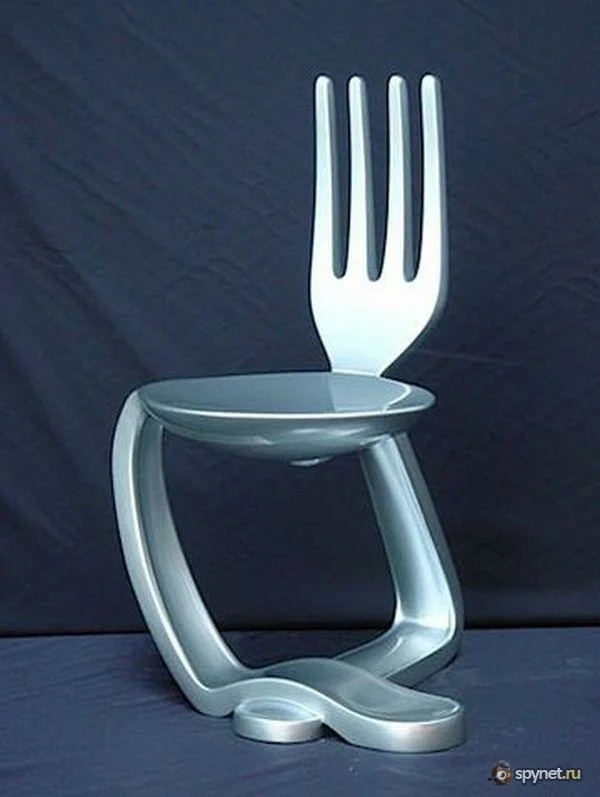

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread(name)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
cv2.imwrite('output.jpg', img)

cv2_imshow(img)